# Single-machine scheduling

Minimizing weighted sum of WIP considering job deadlines

1 | $C_j \leq d_j \; \forall j \in J$ | $\sum_{j \in J}{w_j C_j}$

In [1]:
from bnbprob.machdeadline import (
    Job,
    LagrangianDeadline,
    MachDeadlineProb,
    MachineDeadlineInstance,
)
from bnbpy import BestFirstBnB, BranchAndBound, configure_logfile, plot_tree

In [2]:
configure_logfile("sing_mach_sched.log", mode="w")

## Simple Problem

In [3]:
# Parameters
p = [4, 3, 8, 2, 7, 6]
w = [1, 1, 1, 1, 1, 1]
d = [10, 20, 20, 30, 30, 30]

# Instantiate problem
jobs = [Job(j, p[j], w[j], d[j]) for j in range(len(p))]
problem = MachDeadlineProb(jobs)

ws = problem.warmstart()
print(ws._fixed)

[Job(4), Job(5), Job(2), Job(0), Job(1), Job(3)]


In [4]:
# Parameters
p = [4, 3, 8, 2, 7, 6]
w = [1, 1, 1, 1, 1, 1]
d = [10, 20, 20, 30, 30, 30]

# Instantiate problem
jobs = [Job(j, p[j], w[j], d[j]) for j in range(len(p))]
problem = LagrangianDeadline(jobs)
print(problem.calc_bound())

# Solve
bnb = BranchAndBound(eval_node='out', save_tree=True)
sol = bnb.solve(problem)
print(f'Nodes explored: {bnb.explored}')
print(sol)
print(sol.problem.write())

86
Nodes explored: 0
Status: OPTIMAL | Cost: 86.0 | LB: 86.0
Job(3)->Job(1)->Job(0)->Job(2)->Job(5)->Job(4)


In [5]:
# Parameters
p = [4, 3, 8, 2, 7, 6]
w = [1, 1, 1, 1, 1, 1]
d = [10, 20, 20, 30, 30, 30]

# Instantiate problem
jobs = [Job(j, p[j], w[j], d[j]) for j in range(len(p))]
problem = MachDeadlineProb(jobs)

# Solve
bnb = BranchAndBound(eval_node='out', save_tree=True)
sol = bnb.solve(problem)
print(f'Nodes explored: {bnb.explored}')
print(sol)
print(sol.problem.write())

# Solve
# Must re-instantiate the problem since the previous search modified it
problem = MachDeadlineProb(jobs)
bnb_lb = BestFirstBnB(eval_node='out', save_tree=True)
sol_lb = bnb_lb.solve(problem)
print(f'Nodes explored: {bnb_lb.explored}')
print(sol_lb)
print(sol_lb.problem.write())

Nodes explored: 2
Status: OPTIMAL | Cost: 86.0 | LB: 86.0
Job(3)->Job(1)->Job(0)->Job(2)->Job(5)->Job(4)
Nodes explored: 2
Status: OPTIMAL | Cost: 86.0 | LB: 86.0
Job(3)->Job(1)->Job(0)->Job(2)->Job(5)->Job(4)


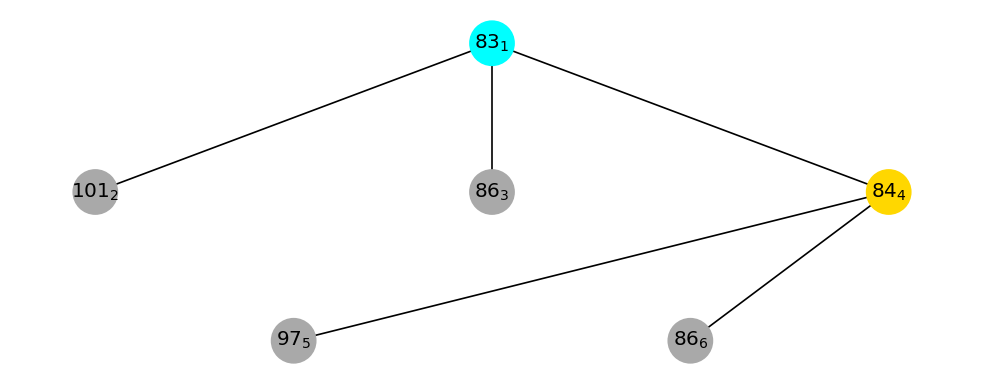

In [6]:
plot_tree(bnb.root, dpi=120, figsize=[8, 3])

## Randomized Larger Instance

In [7]:
# Instantiate problem
instance = MachineDeadlineInstance.randomized(25, seed=1)
print(instance.meta)
problem = MachDeadlineProb(instance.jobs)

# Solve
bnb = BranchAndBound(eval_node='in', save_tree=False)
sol = bnb.solve(problem)
print(f'Nodes explored: {bnb.explored}')
print(sol)
print(sol.problem.write())

MetaData(L=0.7, R=0.4, P=1348, deadline_range=(673, 1213))
Nodes explored: 1
Status: INFEASIBLE | Cost: inf | LB: 51743.0
Job(17)->Job(11)->Job(8)->Job(22)->Job(0)->Job(12)->Job(4)->Job(10)->Job(13)->Job(20)->Job(24)->Job(19)->Job(23)->Job(14)->Job(6)->Job(7)->Job(9)->Job(1)->Job(16)->Job(18)->Job(15)->Job(5)->Job(2)->Job(21)->Job(3)


In [8]:
# Instantiate problem
instance = MachineDeadlineInstance.randomized(50, seed=12)
print(instance.meta)
problem = LagrangianDeadline(instance.jobs)

# Solve
bnb = BranchAndBound(eval_node='in', save_tree=False)
sol = bnb.solve(problem)
print(f'Nodes explored: {bnb.explored}')
print(sol)
print(sol.problem.write())

MetaData(L=0.9, R=1.0, P=2439, deadline_range=(975, 3414))
Nodes explored: 7200
Status: OPTIMAL | Cost: 235707.0 | LB: 235707.0
Job(35)->Job(16)->Job(6)->Job(36)->Job(25)->Job(28)->Job(43)->Job(40)->Job(22)->Job(19)->Job(14)->Job(27)->Job(31)->Job(3)->Job(9)->Job(5)->Job(45)->Job(8)->Job(4)->Job(7)->Job(38)->Job(11)->Job(13)->Job(47)->Job(21)->Job(32)->Job(30)->Job(39)->Job(2)->Job(15)->Job(0)->Job(41)->Job(23)->Job(34)->Job(42)->Job(10)->Job(46)->Job(24)->Job(18)->Job(29)->Job(33)->Job(26)->Job(17)->Job(49)->Job(1)->Job(20)->Job(48)->Job(12)->Job(44)->Job(37)


In [9]:
def normal_solve(n: int, seed: int) -> float:
    instance = MachineDeadlineInstance.randomized(n, seed=seed)
    problem = MachDeadlineProb(instance.jobs)

    bnb = BranchAndBound(eval_node='in', save_tree=False)
    sol = bnb.solve(problem)
    return sol.cost


def lagrangian_solve(n: int, seed: int) -> float:
    instance = MachineDeadlineInstance.randomized(n, seed=seed)
    problem = LagrangianDeadline(instance.jobs)

    bnb = BranchAndBound(eval_node='in', save_tree=False)
    sol = bnb.solve(problem)
    return sol.cost

In [ ]:
for n in [50]:
    for seed in range(100):
        instance = MachineDeadlineInstance.randomized(n, seed=seed)
        problem = LagrangianDeadline(instance.jobs)

        bnb = BranchAndBound(eval_node='in', save_tree=False)
        sol = bnb.solve(problem, maxiter=1_000_000)
        if sol.status == sol.status.INFEASIBLE:
            continue
        print(f'Nodes explored: {bnb.explored}')

Nodes explored: 1773
Nodes explored: 3586
Nodes explored: 373
Nodes explored: 53
Nodes explored: 287
